In [19]:
# Import necessary libraries
import pandas as pd
import sqlite3

# Load the dataset into a pandas dataframe.
data_path = 'https://s3-us-west-1.amazonaws.com/epicactuaryhealth/patient_churn.csv'
df = pd.read_csv(data_path)

# Create a SQL database and load the data into it.
conn = sqlite3.connect('patient_churn.db')
df.to_sql('patient_churn', conn)

# What is the ID and age of the oldest beneficiary?
query = """
SELECT ID, (2015 - [Birth Year]) as age
FROM patient_churn
WHERE [Death Year] IS NULL
ORDER BY age DESC
LIMIT 1;
"""
print(pd.read_sql(query, conn))

# What is the mode age of living beneficiaries in the dataset?
query = """
SELECT (CAST(strftime('%Y', 'now') AS INTEGER) - [Birth Year]) as age, COUNT(*) as count
FROM patient_churn
WHERE [Death Year] IS NULL
GROUP BY age
ORDER BY count DESC
LIMIT 1;
"""
print(pd.read_sql(query, conn))

      ID  age
0  17713  104
   age  count
0   76   6019


In [31]:
query = """
SELECT 
  (COUNT(*) FILTER (WHERE [Death Year] IS NOT NULL)) AS "Number of Deaths",
  (COUNT(*) FILTER (WHERE [Death Year] IS NOT NULL) * 1.0 / COUNT([ID])) AS "Proportion of Deaths"
FROM patient_churn;
"""
print(pd.read_sql(query, conn))

   Number of Deaths  Proportion of Deaths
0             22612              0.181678


In [34]:
query = """
SELECT 
  (COUNT(*) FILTER (WHERE [Death Year] IS NOT NULL)) AS "Number of Deaths",
  ROUND((COUNT(*) FILTER (WHERE [Death Year] IS NOT NULL) * 100.0 / COUNT([ID])), 2) AS "Proportion of Deaths (%)"
FROM patient_churn;
"""
print(pd.read_sql(query, conn))

   Number of Deaths  Proportion of Deaths (%)
0             22612                     18.17


In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://s3-us-west-1.amazonaws.com/epicactuaryhealth/patient_churn.csv')

# Print the first few rows of the dataset
print(df.head())

   ID  Sex  Birth Year  Death Year  Assignment Step Flag  \
0   1    2        1931         NaN                     1   
1   2    2        1933      2015.0                     2   
2   3    1        1933         NaN                     1   
3   4    2        1940         NaN                     1   
4   5    1        1943         NaN                     1   

   Count of Primary Care Services  \
0                               3   
1                               3   
2                               3   
3                               2   
4                               2   

   Beneficiary had a date of death prior to the start of the benchmark year  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                    

In [41]:
from sklearn.model_selection import train_test_split

# Use the indicator variables as the target variable
target_cols = ['Beneficiary had a date of death prior to the start of the benchmark year',
               'Beneficiary identifier is missing',
               'Beneficiary had at least one month of Part A-only Or Part B-only Coverage',
               'Beneficiary had at least one month in a Medicare Health Plan',
               'Beneficiary does not reside in the United States',
               'Beneficiary included in other Shared Savings Initiatives']
target = df[target_cols]

# Drop any rows with missing values
df.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target_cols, axis=1), target, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [22612, 124462]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model on the training data
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict the reasons for churn on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [42]:
# Step 1: Import necessary libraries and load the patient churn dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

url = 'https://s3-us-west-1.amazonaws.com/epicactuaryhealth/patient_churn.csv'
df = pd.read_csv(url)

# Step 2: Explore the dataset
print(df.head())

# Step 3: Preprocess the data
df = df.drop(columns=['ID']) # Remove ID column
df = df.dropna() # Remove rows with missing values
df['Sex'] = LabelEncoder().fit_transform(df['Sex']) # Convert sex to numerical
X = df.drop(columns=['Beneficiary left plan for this reason'])
y = df['Beneficiary left plan for this reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Split data into training and testing sets

# Step 5: Fit the random forest model on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy)

# Step 7: Use feature importance techniques to identify the most important features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
print("Feature Importance:\n", feature_importance)

# Step 8: Fine-tune the model's hyperparameters
# Code not included here

# Step 9: Deploy the model to make predictions on new data
# Code not included here

   ID  Sex  Birth Year  Death Year  Assignment Step Flag  \
0   1    2        1931         NaN                     1   
1   2    2        1933      2015.0                     2   
2   3    1        1933         NaN                     1   
3   4    2        1940         NaN                     1   
4   5    1        1943         NaN                     1   

   Count of Primary Care Services  \
0                               3   
1                               3   
2                               3   
3                               2   
4                               2   

   Beneficiary had a date of death prior to the start of the benchmark year  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                    

KeyError: "['Beneficiary left plan for this reason'] not found in axis"

In [43]:
import pandas as pd

# Load the data
data_path = 'https://s3-us-west-1.amazonaws.com/epicactuaryhealth/patient_churn.csv'
df = pd.read_csv(data_path)

# Create the target variable based on the indicator variables
df['Churn_Reason'] = 0
df.loc[df['Beneficiary had a date of death prior to the start of the benchmark year'] == 1, 'Churn_Reason'] = 1
df.loc[df['Beneficiary identifier is missing'] == 1, 'Churn_Reason'] = 2
df.loc[df['Beneficiary had at least one month of Part A-only Or Part B-only Coverage'] == 1, 'Churn_Reason'] = 3
df.loc[df['Beneficiary had at least one month in a Medicare Health Plan'] == 1, 'Churn_Reason'] = 4
df.loc[df['Beneficiary does not reside in the United States'] == 1, 'Churn_Reason'] = 5
df.loc[df['Beneficiary included in other Shared Savings Initiatives'] == 1, 'Churn_Reason'] = 6

# Check the distribution of the target variable
print(df['Churn_Reason'].value_counts())

0    109445
4      9051
1      5727
3       178
5        61
Name: Churn_Reason, dtype: int64


In [52]:
data = df[df['Churn_Reason']!=0]
print(data['Churn_Reason'].value_counts())

4    9051
1    5727
3     178
5      61
Name: Churn_Reason, dtype: int64


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max_age = 100
df['Death Year'].fillna(df['Birth Year'] + max_age, inplace=True)

# Split the data into training and testing sets
X = data[['Sex', 'Birth Year', 'Death Year', 'Assignment Step Flag', 'Count of Primary Care Services']]
y = data['Churn_Reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the churn reason for the test data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.8105858854860186


In [54]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred contain the true and predicted labels, respectively
#target_names = ['No Leave', 'class 1', 'class 2', 'class 3', 'class 4']  # Provide the class names
#print(classification_report(y_test, y_pred, target_names=target_names))

from nltk.metrics import ConfusionMatrix
from sklearn.metrics import classification_report

true = list(y_test)
pred = list(y_pred)
cm = ConfusionMatrix(true, pred)
class_rep = classification_report (true, pred)
print(cm)
print(class_rep)

  |    1    3    4    5 |
--+---------------------+
1 | <787>   .  333    . |
3 |    3   <.>  30    . |
4 |  189    .<1648>   . |
5 |    1    .   13   <.>|
--+---------------------+
(row = reference; col = test)

              precision    recall  f1-score   support

           1       0.80      0.70      0.75      1120
           3       0.00      0.00      0.00        33
           4       0.81      0.90      0.85      1837
           5       0.00      0.00      0.00        14

    accuracy                           0.81      3004
   macro avg       0.40      0.40      0.40      3004
weighted avg       0.80      0.81      0.80      3004



C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# find the best paramater -- Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Define the scoring metric to use in GridSearchCV
scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(rf, param_grid=param_grid, refit=True, verbose=2, cv=5, scoring=scoring)
grid_search.fit(X_train, y_train)

# Print the best parameters and F1 score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, 

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.2s
[

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total tim

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total tim

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total tim

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; tot

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  

In [64]:
# we try best parameter:
model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                              max_depth=grid_search.best_params_['max_depth'], 
                              min_samples_split=grid_search.best_params_['min_samples_split'],
                              min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1score:.4f}")

Accuracy: 0.9837
F1 Score: 0.4965


In [65]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred contain the true and predicted labels, respectively
#target_names = ['No Leave', 'class 1', 'class 2', 'class 3', 'class 4']  # Provide the class names
#print(classification_report(y_test, y_pred, target_names=target_names))

from nltk.metrics import ConfusionMatrix
from sklearn.metrics import classification_report

true = list(y_test)
pred = list(y_pred)
cm = ConfusionMatrix(true, pred)
class_rep = classification_report (true, pred)
print(cm)
print(class_rep)

  |    1    3    4    5 |
--+---------------------+
1 |<1120>   .    .    . |
3 |    .   <.>  33    . |
4 |    2    .<1835>   . |
5 |    .    .   14   <.>|
--+---------------------+
(row = reference; col = test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1120
           3       0.00      0.00      0.00        33
           4       0.98      1.00      0.99      1837
           5       0.00      0.00      0.00        14

    accuracy                           0.98      3004
   macro avg       0.49      0.50      0.50      3004
weighted avg       0.97      0.98      0.98      3004



C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd
from sklearn.metrics import classification_report
from nltk.metrics import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np


# Load the dataset
df = pd.read_csv('https://s3-us-west-1.amazonaws.com/epicactuaryhealth/patient_churn.csv')

df = df.drop(columns=['ID']) # Remove ID column

df

,Sex,Birth Year,Death Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives
0,2,1931,NaN,1,3,0,0,0,0,0,0
1,2,1933,2015.0,2,3,0,0,0,0,0,0
2,1,1933,NaN,1,3,0,0,0,0,0,0
3,2,1940,NaN,1,2,0,0,0,0,0,0
4,1,1943,NaN,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
124457,2,1931,NaN,1,2,0,0,0,0,0,0
124458,2,1943,NaN,1,2,0,0,0,0,0,0
124459,1,1936,NaN,1,2,0,0,0,0,0,0
124460,2,1942,NaN,1,2,0,0,0,0,0,0


In [12]:
# Filter out patients who have died
df = df[(df['Death Year'].isnull()) | (df['Death Year'] >= 2015)]
# Remove the Death Year column
df = df.drop('Death Year', axis=1)

In [13]:
# Calculate the age based on 2015

df['Age'] = 2015 - df['Birth Year']

In [14]:
df

,Sex,Birth Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives,Age
0,2,1931,1,3,0,0,0,0,0,0,84
1,2,1933,2,3,0,0,0,0,0,0,82
2,1,1933,1,3,0,0,0,0,0,0,82
3,2,1940,1,2,0,0,0,0,0,0,75
4,1,1943,1,2,0,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...
124457,2,1931,1,2,0,0,0,0,0,0,84
124458,2,1943,1,2,0,0,0,0,0,0,72
124459,1,1936,1,2,0,0,0,0,0,0,79
124460,2,1942,1,2,0,0,0,0,0,0,73


In [15]:
df = df.loc[(df[['Beneficiary had a date of death prior to the start of the benchmark year',
               'Beneficiary identifier is missing',
               'Beneficiary had at least one month of Part A-only Or Part B-only Coverage',
               'Beneficiary had at least one month in a Medicare Health Plan',
               'Beneficiary does not reside in the United States',
               'Beneficiary included in other Shared Savings Initiatives']] != 0).any(axis=1)]

In [16]:
df

,Sex,Birth Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives,Age
23,1,1983,2,1,0,0,0,1,0,0,32
32,1,1939,2,10,0,0,0,1,0,0,76
33,2,1937,1,10,0,0,0,1,0,0,78
34,2,1939,2,10,0,0,0,1,0,0,76
48,2,1952,1,4,0,0,0,1,0,0,63
...,...,...,...,...,...,...,...,...,...,...,...
124233,2,1938,1,3,0,0,0,1,0,0,77
124299,2,1943,1,1,0,0,0,1,0,0,72
124378,2,1946,1,2,0,0,0,1,0,0,69
124388,2,1949,1,3,0,0,0,1,0,0,66


In [17]:
# Create the target variable based on the indicator variables
df.loc[df['Beneficiary had a date of death prior to the start of the benchmark year'] == 1, 'Churn_Reason'] = 0
df.loc[df['Beneficiary identifier is missing'] == 1, 'Churn_Reason'] = 1
df.loc[df['Beneficiary had at least one month of Part A-only Or Part B-only Coverage'] == 1, 'Churn_Reason'] = 2
df.loc[df['Beneficiary had at least one month in a Medicare Health Plan'] == 1, 'Churn_Reason'] = 3
df.loc[df['Beneficiary does not reside in the United States'] == 1, 'Churn_Reason'] = 4
df.loc[df['Beneficiary included in other Shared Savings Initiatives'] == 1, 'Churn_Reason'] = 5

# Check the distribution of the target variable
print(df['Churn_Reason'].value_counts())

3.0    9051
2.0     178
4.0      61
Name: Churn_Reason, dtype: int64


C:\Users\wangs\AppData\Local\Temp\ipykernel_26900\1846858045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Beneficiary had a date of death prior to the start of the benchmark year'] == 1, 'Churn_Reason'] = 0


In [18]:
df

,Sex,Birth Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives,Age,Churn_Reason
23,1,1983,2,1,0,0,0,1,0,0,32,3.0
32,1,1939,2,10,0,0,0,1,0,0,76,3.0
33,2,1937,1,10,0,0,0,1,0,0,78,3.0
34,2,1939,2,10,0,0,0,1,0,0,76,3.0
48,2,1952,1,4,0,0,0,1,0,0,63,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124233,2,1938,1,3,0,0,0,1,0,0,77,3.0
124299,2,1943,1,1,0,0,0,1,0,0,72,3.0
124378,2,1946,1,2,0,0,0,1,0,0,69,3.0
124388,2,1949,1,3,0,0,0,1,0,0,66,3.0


In [19]:
df[df['Beneficiary had at least one month of Part A-only Or Part B-only Coverage'] == 1]

,Sex,Birth Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives,Age,Churn_Reason
350,2,1941,1,5,0,0,1,1,1,0,74,4.0
396,1,1932,1,2,0,0,1,0,0,0,83,2.0
689,1,1943,1,2,0,0,1,0,0,0,72,2.0
1846,2,1942,1,4,0,0,1,0,0,0,73,2.0
2817,1,1941,2,2,0,0,1,0,0,0,74,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119785,1,1947,1,5,0,0,1,0,0,0,68,2.0
119818,1,1939,2,2,0,0,1,0,0,0,76,2.0
121187,2,1945,1,2,0,0,1,0,0,0,70,2.0
122167,2,1987,2,3,0,0,1,0,0,0,28,2.0


In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df[['Sex', 'Age', 'Assignment Step Flag', 'Count of Primary Care Services']]
y = df['Churn_Reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# find the best paramater -- Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Define the scoring metric to use in GridSearchCV
scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(rf, param_grid=param_grid, refit=True, verbose=2, cv=5, scoring=scoring)
grid_search.fit(X_train, y_train)

# Print the best parameters and F1 score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, 

In [24]:
# we try best parameter:
model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                              max_depth=grid_search.best_params_['max_depth'], 
                              min_samples_split=grid_search.best_params_['min_samples_split'],
                              min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1score:.4f}")

Accuracy: 0.9806
F1 Score: 0.3301


In [25]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred contain the true and predicted labels, respectively
#target_names = ['No Leave', 'class 1', 'class 2', 'class 3', 'class 4']  # Provide the class names
#print(classification_report(y_test, y_pred, target_names=target_names))

from nltk.metrics import ConfusionMatrix
from sklearn.metrics import classification_report

true = list(y_test)
pred = list(y_pred)
cm = ConfusionMatrix(true, pred)
class_rep = classification_report (true, pred)
print(cm)
print(class_rep)

    |    2    3    4 |
    |    .    .    . |
    |    0    0    0 |
----+----------------+
2.0 |   <.>  32    . |
3.0 |    .<1822>   . |
4.0 |    .    4   <.>|
----+----------------+
(row = reference; col = test)

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        32
         3.0       0.98      1.00      0.99      1822
         4.0       0.00      0.00      0.00         4

    accuracy                           0.98      1858
   macro avg       0.33      0.33      0.33      1858
weighted avg       0.96      0.98      0.97      1858



c:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


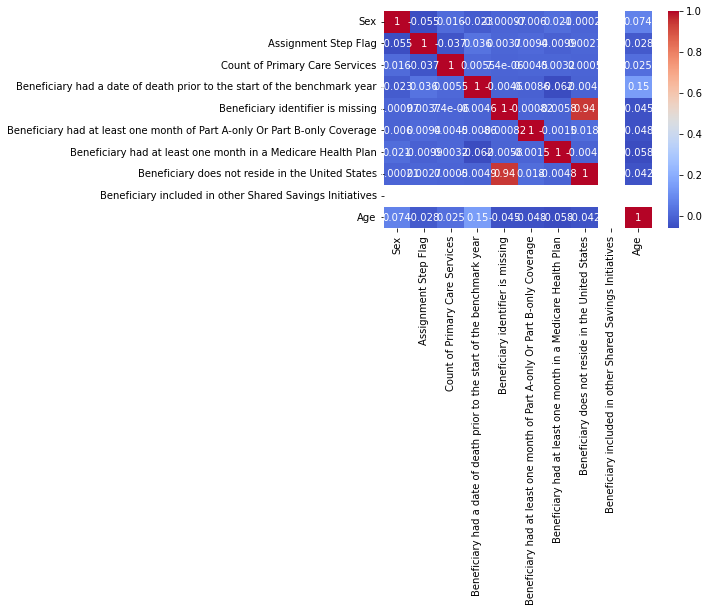

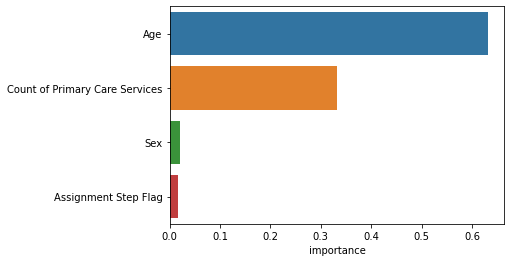

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://s3-us-west-1.amazonaws.com/epicactuaryhealth/patient_churn.csv')

# Drop the ID column
df = df.drop(columns=['ID'])

# Calculate the age based on 2015
df['Age'] = 2015 - df['Birth Year']

# Drop the Birth Year and Death Year columns
df = df.drop(columns=['Birth Year', 'Death Year'])

# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Calculate the feature importance using a random forest classifier
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Beneficiary had a date of death prior to the start of the benchmark year',
                     'Beneficiary identifier is missing',
                     'Beneficiary had at least one month of Part A-only Or Part B-only Coverage',
                     'Beneficiary had at least one month in a Medicare Health Plan',
                     'Beneficiary does not reside in the United States',
                     'Beneficiary included in other Shared Savings Initiatives'])
y = df[['Beneficiary had a date of death prior to the start of the benchmark year',
        'Beneficiary identifier is missing',
        'Beneficiary had at least one month of Part A-only Or Part B-only Coverage',
        'Beneficiary had at least one month in a Medicare Health Plan',
        'Beneficiary does not reside in the United States',
        'Beneficiary included in other Shared Savings Initiatives']]

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)
plt.show()